In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('C://Datasets//airfoil_self_noise.dat',sep='\t',header=None)

In [3]:
df.head()

,0,1,2,3,4,5
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


- Defining column names

In [4]:
col = ['Frequency', 'Angle_of_attack', 'Chord_length', 'stream_velocity',  'displacement_thickness',  'Sound_Pressure_Level']
df.columns = col

In [5]:
df.head()

,Frequency,Angle_of_attack,Chord_length,stream_velocity,displacement_thickness,Sound_Pressure_Level
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


- Basic Information

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Frequency               1503 non-null   int64  
 1   Angle_of_attack         1503 non-null   float64
 2   Chord_length            1503 non-null   float64
 3   stream_velocity         1503 non-null   float64
 4   displacement_thickness  1503 non-null   float64
 5   Sound_Pressure_Level    1503 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 70.6 KB


In [7]:
df.describe()

,Frequency,Angle_of_attack,Chord_length,stream_velocity,displacement_thickness,Sound_Pressure_Level
count,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000
mean,2886.380572,6.782302,0.136548,50.860745,0.011140,124.835943
std,3152.573137,5.918128,0.093541,15.572784,0.013150,6.898657
min,200.000000,0.000000,0.025400,31.700000,0.000401,103.380000
25%,800.000000,2.000000,0.050800,39.600000,0.002535,120.191000
50%,1600.000000,5.400000,0.101600,39.600000,0.004957,125.721000
75%,4000.000000,9.900000,0.228600,71.300000,0.015576,129.995500
max,20000.000000,22.200000,0.304800,71.300000,0.058411,140.987000


In [8]:
df.corr()

,Frequency,Angle_of_attack,Chord_length,stream_velocity,displacement_thickness,Sound_Pressure_Level
Frequency,1.000000,-0.272765,-0.003661,0.133664,-0.230107,-0.390711
Angle_of_attack,-0.272765,1.000000,-0.504868,0.058760,0.753394,-0.156108
Chord_length,-0.003661,-0.504868,1.000000,0.003787,-0.220842,-0.236162
stream_velocity,0.133664,0.058760,0.003787,1.000000,-0.003974,0.125103
displacement_thickness,-0.230107,0.753394,-0.220842,-0.003974,1.000000,-0.312670
Sound_Pressure_Level,-0.390711,-0.156108,-0.236162,0.125103,-0.312670,1.000000


In [9]:
df.isnull().sum()

Frequency                 0
Angle_of_attack           0
Chord_length              0
stream_velocity           0
displacement_thickness    0
Sound_Pressure_Level      0
dtype: int64

In [10]:
df.shape

(1503, 6)

- Defining Input and Output Features

In [11]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [12]:
y

0       126.201
1       125.201
2       125.951
3       127.591
4       127.461
         ...   
1498    110.264
1499    109.254
1500    106.604
1501    106.224
1502    104.204
Name: Sound_Pressure_Level, Length: 1503, dtype: float64

- Train Test Split

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.30, random_state = 0)

In [14]:
x_train

,Frequency,Angle_of_attack,Chord_length,stream_velocity,displacement_thickness
820,500,8.4,0.0508,39.6,0.005662
879,2000,15.4,0.0508,71.3,0.026427
946,3150,19.7,0.0508,71.3,0.034118
862,1000,11.2,0.0508,39.6,0.015048
704,2500,12.6,0.1524,71.3,0.048316
...,...,...,...,...,...
763,12500,0.0,0.0508,39.6,0.000792
835,1250,8.4,0.0508,31.7,0.005808
1216,1250,22.2,0.0254,71.3,0.021418
559,1250,5.4,0.1524,55.5,0.004333


# EDA

In [15]:
x_train.corr()

,Frequency,Angle_of_attack,Chord_length,stream_velocity,displacement_thickness
Frequency,1.000000,-0.270737,0.003595,0.138767,-0.241245
Angle_of_attack,-0.270737,1.000000,-0.509920,0.057222,0.756393
Chord_length,0.003595,-0.509920,1.000000,0.018383,-0.231793
stream_velocity,0.138767,0.057222,0.018383,1.000000,0.013864
displacement_thickness,-0.241245,0.756393,-0.231793,0.013864,1.000000


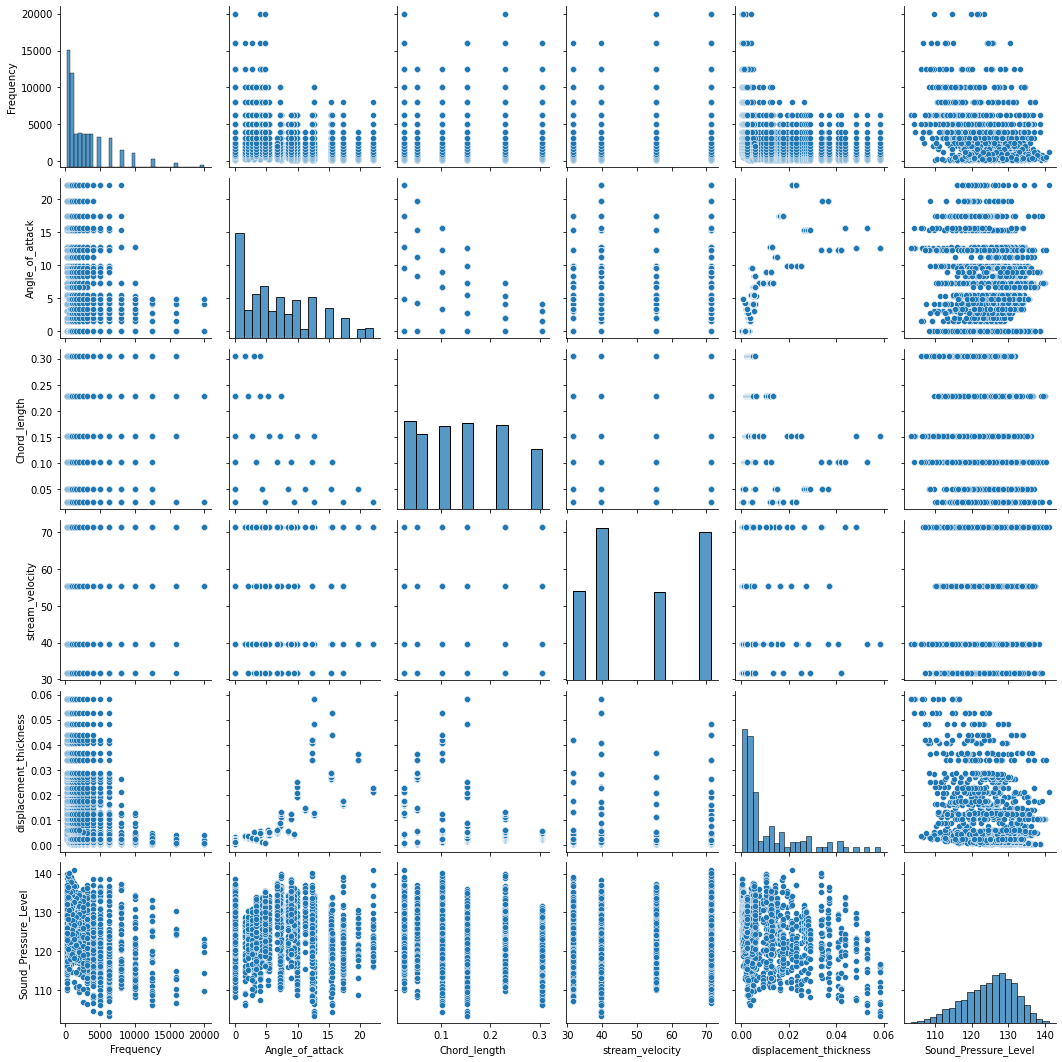

In [16]:
sns.pairplot(df)

In [17]:
len(y.unique())

1456

- as there are many values in our output feature, we can consider this a a regression problem

# Normalising the data for some algoritms

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scl = StandardScaler()
scl.fit(x_train)
x_train_scaled = scl.transform(x_train)
x_test_scaled = scl.transform(x_test)


# Linear Regression Model

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
lr = LinearRegression()

In [22]:
lr.fit(x_train, y_train)

LinearRegression()

In [23]:
y_pred_lr = lr.predict(x_test)

- Model Evaluation

In [24]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [25]:
print('The R2 score for this model is ', r2_score(y_test,y_pred_lr))
print('The mean_squared_error for this model is ', mean_squared_error(y_test,y_pred_lr))
print('The mean_absolute_error for this model is ', mean_absolute_error(y_test,y_pred_lr))

The R2 score for this model is  0.5236569764926969
The mean_squared_error for this model is  22.395946643814163
The mean_absolute_error for this model is  3.674731065415621


In [26]:
r2_lr = r2_score(y_test,y_pred_lr)

# Lasso Regression Model

In [27]:
from sklearn.linear_model import Lasso

In [28]:
lasso = Lasso()

In [29]:
lasso.fit(x_train, y_train)

Lasso()

In [30]:
y_pred_ls = lasso.predict(x_test)

- Model Evaluation

In [31]:
print('The R2 score for this model is ', r2_score(y_test,y_pred_ls))
print('The mean_squared_error for this model is ', mean_squared_error(y_test,y_pred_ls))
print('The mean_absolute_error for this model is ', mean_absolute_error(y_test,y_pred_ls))

The R2 score for this model is  0.3151990077467093
The mean_squared_error for this model is  32.19689536169004
The mean_absolute_error for this model is  4.536516104573355


In [32]:
r2_ls = r2_score(y_test,y_pred_ls)

# Ridge Regression Model

In [33]:
from sklearn.linear_model import Ridge

In [34]:
ridge = Ridge()

In [35]:
ridge.fit(x_train, y_train)

Ridge()

In [36]:
y_pred_rdg = ridge.predict(x_test)

- Model Evaluation

In [37]:
print('The R2 score for this model is ', r2_score(y_test,y_pred_rdg))
print('The mean_squared_error for this model is ', mean_squared_error(y_test,y_pred_rdg))
print('The mean_absolute_error for this model is ', mean_absolute_error(y_test,y_pred_rdg))

The R2 score for this model is  0.5028087836371785
The mean_squared_error for this model is  23.376154166062
The mean_absolute_error for this model is  3.816122291592529


In [38]:
r2_rdg = r2_score(y_test,y_pred_rdg)

# Elasticnet Regression Model

In [39]:
from sklearn.linear_model import ElasticNet

In [40]:
enet = ElasticNet()

In [41]:
enet.fit(x_train, y_train)

ElasticNet()

In [42]:
y_pred_ent = enet.predict(x_test)

- Model Evaluation

In [43]:
print('The R2 score for this model is ', r2_score(y_test,y_pred_ent))
print('The mean_squared_error for this model is ', mean_squared_error(y_test,y_pred_ent))
print('The mean_absolute_error for this model is ', mean_absolute_error(y_test,y_pred_ent))

The R2 score for this model is  0.31695751664078053
The mean_squared_error for this model is  32.114216557927335
The mean_absolute_error for this model is  4.536781092624099


In [44]:
r2_enet = r2_score(y_test,y_pred_ent)

# SVR

In [45]:
from sklearn.svm import SVR

In [46]:
svr = SVR()

In [47]:
svr.fit(x_train_scaled, y_train)

SVR()

In [48]:
y_pred_svr = svr.predict(x_test_scaled)

- Model Evaluation

In [49]:
print('The R2 score for this model is ', r2_score(y_test,y_pred_svr))
print('The mean_squared_error for this model is ', mean_squared_error(y_test,y_pred_svr))
print('The mean_absolute_error for this model is ', mean_absolute_error(y_test,y_pred_svr))

The R2 score for this model is  0.7003122766743424
The mean_squared_error for this model is  14.090245747673197
The mean_absolute_error for this model is  2.8350852112316502


In [50]:
r2_svr = r2_score(y_test,y_pred_svr)

# Decision Tree Regressor

In [51]:
from sklearn.tree import DecisionTreeRegressor

In [52]:
dtr = DecisionTreeRegressor()

In [53]:
dtr.fit(x_train_scaled, y_train)

DecisionTreeRegressor()

In [54]:
y_pred_dtr = dtr.predict(x_test_scaled)

- Model Evaluation

In [55]:
print('The R2 score for this model is ', r2_score(y_test,y_pred_dtr))
print('The mean_squared_error for this model is ', mean_squared_error(y_test,y_pred_dtr))
print('The mean_absolute_error for this model is ', mean_absolute_error(y_test,y_pred_dtr))

The R2 score for this model is  0.8775252644322188
The mean_squared_error for this model is  5.758324374722838
The mean_absolute_error for this model is  1.811079822616408


In [56]:
r2_dtr = r2_score(y_test,y_pred_dtr)

# Random Forest Regressor

In [57]:
from sklearn.ensemble import RandomForestRegressor

In [58]:
rfr = RandomForestRegressor()

In [59]:
rfr.fit(x_train_scaled, y_train)

RandomForestRegressor()

In [60]:
y_pred_rfr = rfr.predict(x_test_scaled)

- Model Evaluation

In [61]:
print('The R2 score for this model is ', r2_score(y_test,y_pred_rfr))
print('The mean_squared_error for this model is ', mean_squared_error(y_test,y_pred_rfr))
print('The mean_absolute_error for this model is ', mean_absolute_error(y_test,y_pred_rfr))

The R2 score for this model is  0.9342455826009336
The mean_squared_error for this model is  3.091537717549883
The mean_absolute_error for this model is  1.296089711751661


In [62]:
r2_rfr = r2_score(y_test,y_pred_rfr)

# Creating a table of results of all algorithms

In [63]:
results_model = {'Model' : ['Linear Regression', 'Lasso Regrssion', 'Ridge Regression', 'ElasticNet Regression', 'Support Vector Regression', 'Decision Tree Regression', 'Random Forest Regression'], 
                 'R2 Score' : [r2_lr, r2_ls, r2_rdg, r2_enet, r2_svr, r2_dtr, r2_rfr],
                 'Percentage(R2 Score)' : [r2_lr*100, r2_ls*100, r2_rdg*100, r2_enet*100, r2_svr*100, r2_dtr*100, r2_rfr*100,]
                }

In [64]:
results = pd.DataFrame(data = results_model)

In [65]:
results

,Model,R2 Score,Percentage(R2 Score)
0,Linear Regression,0.523657,52.365698
1,Lasso Regrssion,0.315199,31.519901
2,Ridge Regression,0.502809,50.280878
3,ElasticNet Regression,0.316958,31.695752
4,Support Vector Regression,0.700312,70.031228
5,Decision Tree Regression,0.877525,87.752526
6,Random Forest Regression,0.934246,93.424558


# Creating a pickle file to deploy the model

In [66]:
import pickle

In [67]:
pickle.dump(rfr, open('model.pkl', 'wb'))

In [68]:
pickled_model = pickle.load(open('model.pkl', 'rb'))

# Bulk Input

In [69]:
pickled_model.predict(x_test)

array([110.59502, 110.59502, 110.62893, 110.62893, 110.62893, 110.59502,
       110.62893, 110.59502, 110.62893, 110.59502, 110.62893, 110.62893,
       110.59502, 110.62893, 110.62893, 110.62893, 110.62893, 110.59502,
       110.59114, 110.62893, 110.62893, 110.62893, 110.62893, 110.62893,
       110.62893, 110.62893, 110.59502, 110.62893, 110.62893, 110.62893,
       110.62893, 110.59502, 110.59114, 110.62893, 110.62893, 110.62893,
       110.59502, 110.62893, 110.62893, 110.62893, 110.59502, 110.62893,
       110.62893, 110.62893, 110.62893, 110.62893, 110.62893, 110.59502,
       110.62893, 110.59502, 110.62893, 110.62893, 110.59502, 110.62893,
       110.62893, 110.62893, 110.59502, 110.62893, 110.62893, 110.62893,
       110.62893, 110.62893, 110.62893, 110.62893, 110.62893, 110.62893,
       110.59502, 110.62893, 110.62893, 110.62893, 110.62893, 110.59502,
       110.62893, 110.62893, 110.62893, 110.59502, 110.62893, 110.62893,
       110.62893, 110.59502, 110.62893, 110.62893, 

# Single input

In [70]:
dict_input = {'Frequency': 399, 'Angle_of_attack': 0.5, 'Chord_length': 32, 'stream_velocity': 22.4,
       'displacement_thickness':  0.034}

In [71]:
dict_input.values()

dict_values([399, 0.5, 32, 22.4, 0.034])

In [72]:
# Converting input into 2d array
inp = [list(dict_input.values())]

In [73]:
pickled_model.predict(inp)

array([108.96185])